# Titanic Dataset — EDA & Data Cleaning
Notebook for Project 1: exploratory data analysis, visualization, handling missing data and feature engineering.


In [39]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# prettier plots
%matplotlib inline
sns.set(style="whitegrid")
DATA_DIR = "C:/Users/Anja/learning-portfolio/01-eda-titanic-analysis/data"   # relative path from notebooks folder


In [40]:
csv_path = os.path.join(DATA_DIR, "Titanic-Dataset.csv")
df = pd.read_csv(csv_path)
print(df.columns)
print(type(df['Name']))
df.shape


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.series.Series'>


(891, 12)

In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PassengerId,891.0,NaN,NaN,NaN,446.0,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,NaN,NaN,NaN,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,NaN,NaN,NaN,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Name,891,891,"Braund, Mr. Owen Harris",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,891,2,male,577,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,714.0,NaN,NaN,NaN,29.699118,14.526497,0.42,20.125,28.0,38.0,80.0
SibSp,891.0,NaN,NaN,NaN,0.523008,1.102743,0.0,0.0,0.0,1.0,8.0
Parch,891.0,NaN,NaN,NaN,0.381594,0.806057,0.0,0.0,0.0,0.0,6.0
Ticket,891,681,347082,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fare,891.0,NaN,NaN,NaN,32.204208,49.693429,0.0,7.9104,14.4542,31.0,512.3292


In [17]:
missing_counts = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
missing = pd.concat([missing_counts, missing_percent], axis=1)
missing.columns = ['missing_count', 'missing_percent']
missing

,missing_count,missing_percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


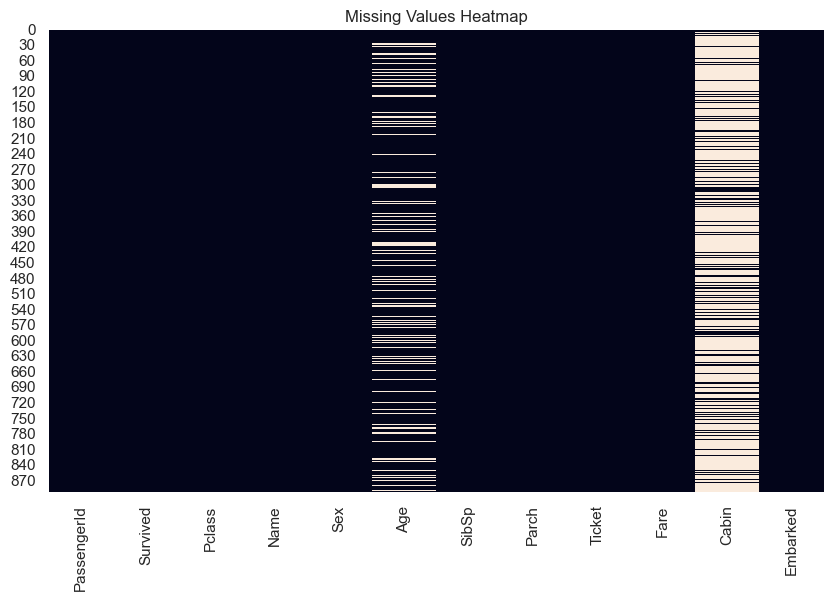

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

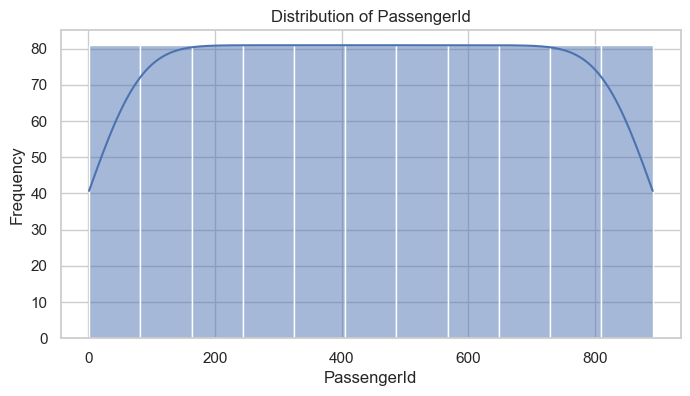

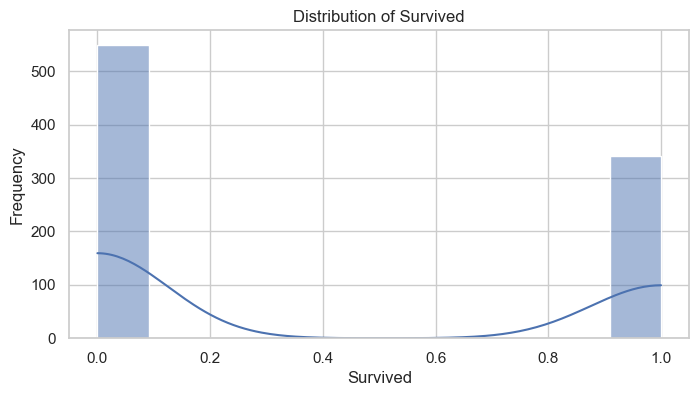

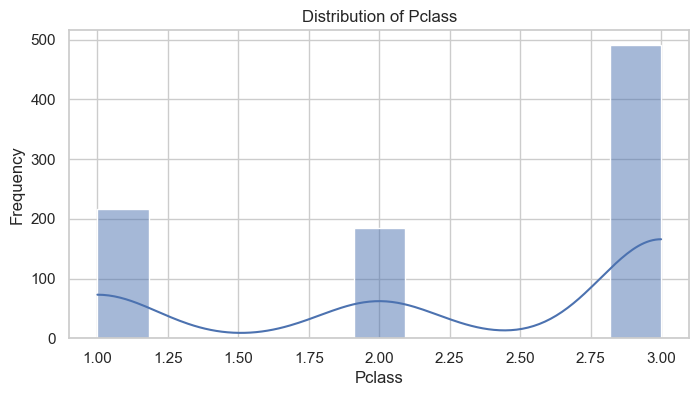

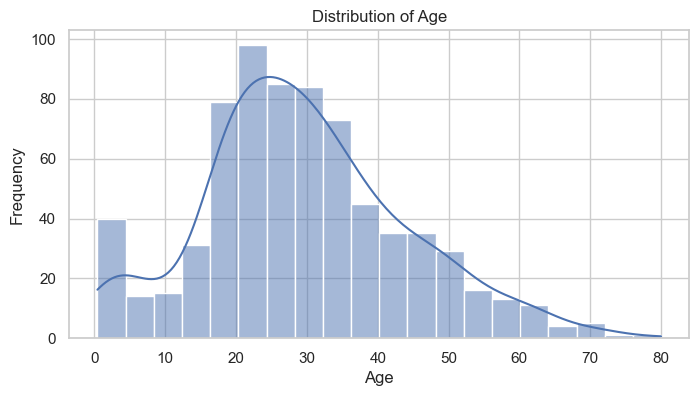

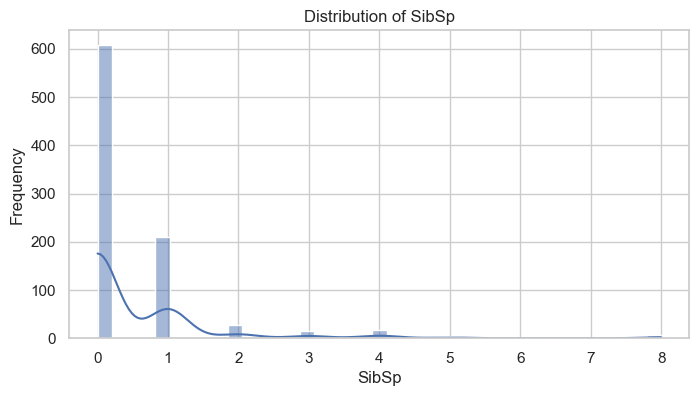

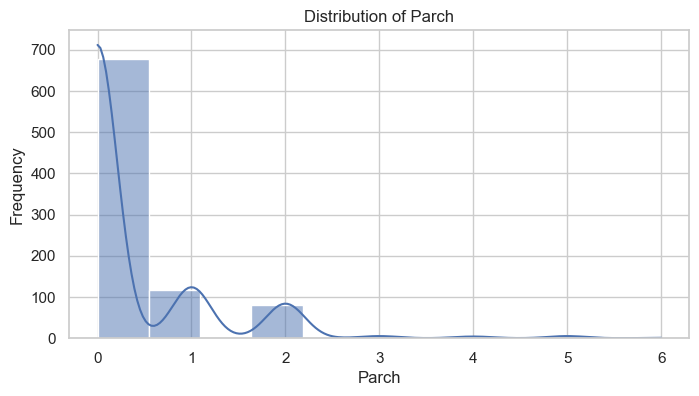

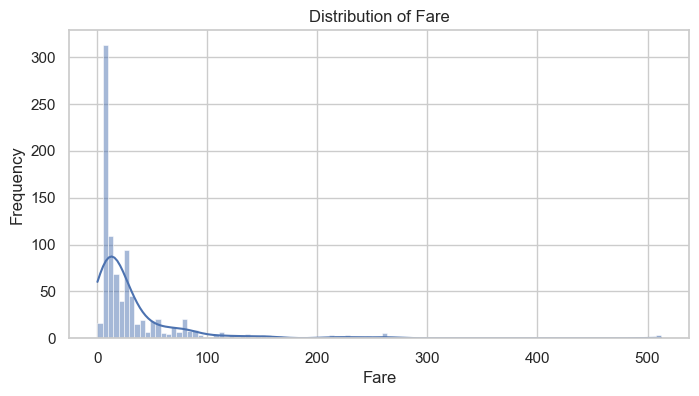

In [19]:
#Univariate analysis - numeric distributions
numeric_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

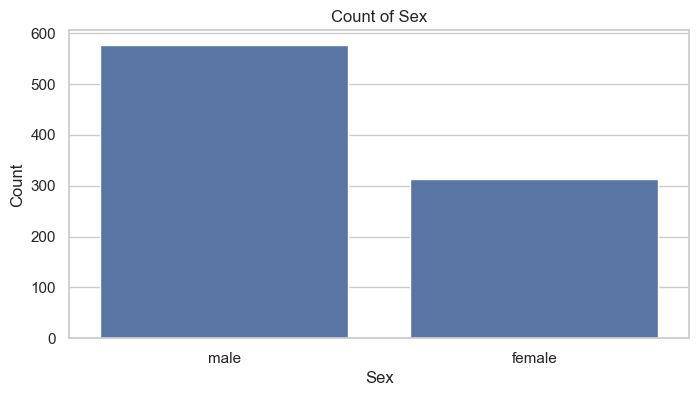

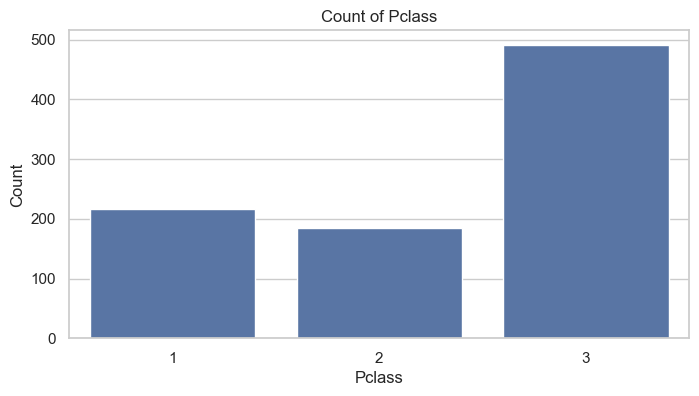

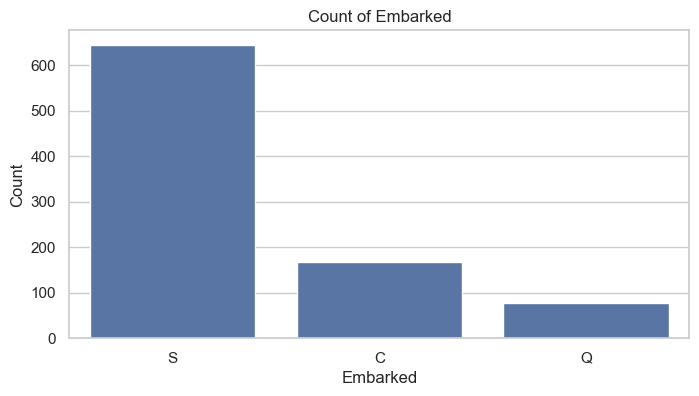

In [20]:
# Categorical counts
cat_cols = ['Sex', 'Pclass', 'Embarked']
for col in cat_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

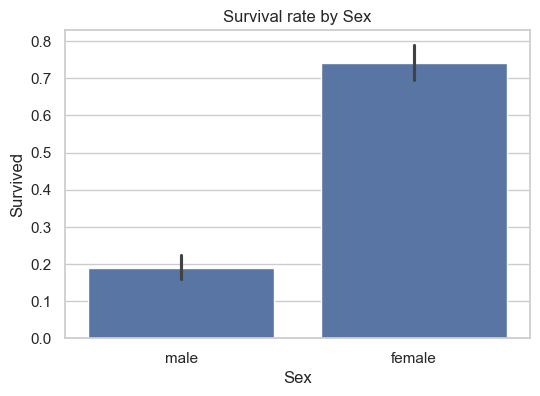

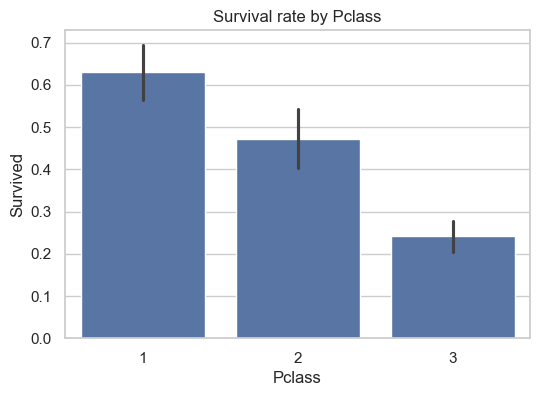

In [21]:
# Survival rate by category
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival rate by Sex')
plt.show()
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df, order=[1,2,3])
plt.title('Survival rate by Pclass')
plt.show()


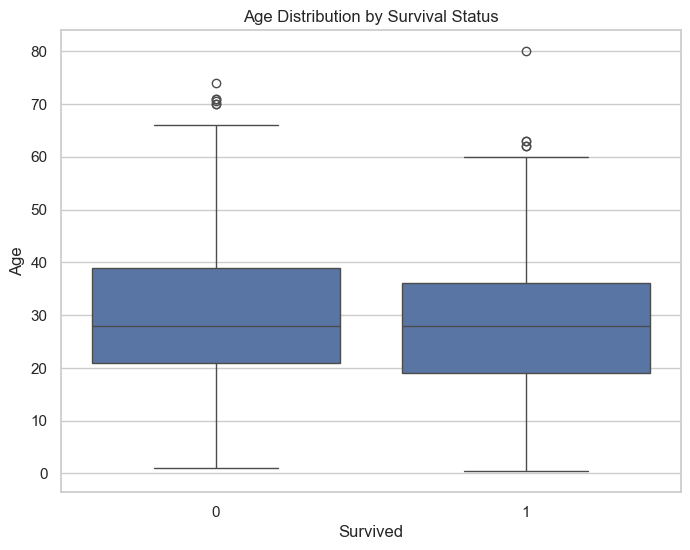

In [22]:
# Age vs Survival
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival Status')
plt.show()

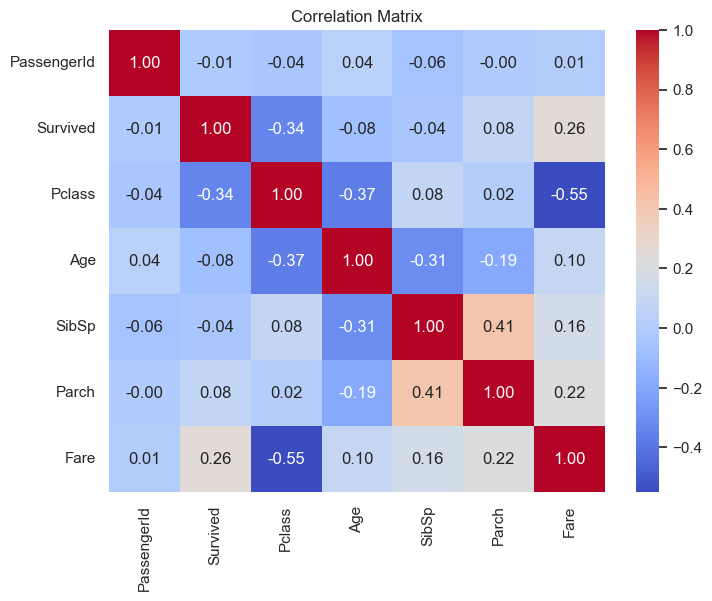

In [27]:
# Correlation matrix for numeric columns only
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=["int64", "float64"]).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Feature engineering and some preprocessing will follow in the next steps.
# Creating a new feature 'FamilySize'
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# Creating a new feature 'IsAlone'
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)
# df[['FamilySize', 'IsAlone']].head()
# Title extraction from 'Name'
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.')
df['Title'] = df['Title'].str.strip()
df[['Name','Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,IsAlone,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr


In [33]:
# Fill missing values in 'Age' with median age
df['Age'] = df['Age'].fillna(df['Age'].median())

# Embarked: fill with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fare: fill with median fare - no missing values, so we skip this step

# Cabin: create indicator whether cabin known, then drop Cabin details
df['CabinKnown'] = df['Cabin'].notnull().astype(int)
df = df.drop(columns=['Cabin'])

# Confirming the number of missing values
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
FamilySize     0
IsAlone        0
Title          0
CabinKnown     0
dtype: int64

In [ ]:
# Convert categorical variables to simple encoded columns for inspection
df_encoded = df.copy()
df_encoded['Sex'] = (df_encoded['Sex'] == 'male').astype(int)
df_encoded = pd.get_dummies(df_encoded, columns=['Embarked', 'Title'], drop_first=True) # depending on the purpose we can encode title as numbers.
df_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Title_the Countess
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,...,False,False,False,False,True,False,False,False,False,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,...,False,False,False,False,False,True,False,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,...,False,True,False,False,False,False,False,False,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,...,False,False,False,False,False,True,False,False,False,False
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,...,False,False,False,False,True,False,False,False,False,False


In [35]:
clean_path = os.path.join(DATA_DIR, "titanic_clean.csv")
df.to_csv(clean_path, index=False)
print("Saved cleaned dataset to:", clean_path)


Saved cleaned dataset to: C:/Users/Anja/learning-portfolio/01-eda-titanic-analysis/data\titanic_clean.csv


## Summary
- Missing values handled: Age (median), Embarked (mode), Cabin replaced with CabinKnown.
- New features created: FamilySize, IsAlone, Title, CabinKnown.
- Cleaned dataset exported to `data/titanic_clean.csv`.


In [36]:
print(df.columns)
print(df.dtypes)


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'FamilySize', 'IsAlone', 'Title',
       'CabinKnown'],
      dtype='object')
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
FamilySize       int64
IsAlone          int64
Title           object
CabinKnown       int64
dtype: object
